In [1]:
import numpy as np
from astropy.table import Table
from astropy.io.ascii import InconsistentTableError
import matplotlib.pyplot as plt
from scipy import stats
import os
from glob import glob
from scipy.optimize import least_squares

In [15]:
def model2(theta, mag, y, zp=22.5, sigdet=5, k=1):
    a, b, maglim = theta 
    teff = np.exp(a + b * (maglim - 21.)) 

    # Compute flux/limit. 
    F = 10**(-0.4 * (mag - zp)) 
    Flim = 10**(-0.4 * (maglim - zp)) 

    # Compute noise. 
    Fnoise = (Flim / sigdet)**2 * k * teff - Flim
    magerr = 2.5 / np.log(10.) * np.sqrt((1. + Fnoise / F) / (F * k * teff))

    return np.sum(np.abs(y - magerr))
    #return magerr - y

def model3(theta, mag, y, a=4.56, b=1, zp=22.5, sigdet=5, k=1):
    maglim = theta 
    teff = np.exp(a + b * (maglim - 21.)) 

    # Compute flux/limit. 
    F = 10**(-0.4 * (mag - zp)) 
    Flim = 10**(-0.4 * (maglim - zp)) 

    # Compute noise. 
    Fnoise = (Flim / sigdet)**2 * k * teff - Flim
    magerr = 2.5 / np.log(10.) * np.sqrt((1. + Fnoise / F) / (F * k * teff))

    return magerr - y

def model4(theta, mag, y, zp=22.5, sigdet=5, k=1):
    teff, maglim = theta 
    #teff = np.exp(a + b * (maglim - 21.)) 

    # Compute flux/limit. 
    F = 10**(-0.4 * (mag - zp)) 
    Flim = 10**(-0.4 * (maglim - zp)) 

    # Compute noise. 
    Fnoise = (Flim / sigdet)**2 * k * teff - Flim
    magerr = 2.5 / np.log(10.) * np.sqrt((1. + Fnoise / F) / (F * k * teff))

    #return -np.sum(np.abs(y - magerr))
    return magerr - y

In [3]:
datapath = f'{os.environ["HOME"]}/Projects/planckClusters/data/extern/SDSS'
files = glob(f'{datapath}/PSZ**/*.csv')

In [13]:
files

['/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G009.04+31.09/PSZ2_G009.04+31.09_SDSS_catalog.csv',
 '/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G023.05+20.52/PSZ2_G023.05+20.52_SDSS_catalog.csv',
 '/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G029.87-17.81/PSZ2_G029.87-17.81_SDSS_catalog.csv',
 '/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G030.70+09.44/PSZ2_G030.70+09.44_SDSS_catalog.csv',
 '/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G031.41-19.16/PSZ2_G031.41-19.16_SDSS_catalog.csv',
 '/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G032.31+66.07/PSZ2_G032.31+66.07_SDSS_catalog.csv',
 '/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G036.36+16.01/PSZ2_G036.36+16.01_SDSS_catalog.csv',
 '/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G044.21+52.13/PSZ2_G044.21+52.13_SDSS_catalog.csv',
 '/home/boada/Projects/planckClusters/data/extern/SDSS/PSZ2_G045.96-26.94/PSZ2_G045.96-26.94_SDSS_catalo

In [19]:
band = 'i'
maglim = []
for f in files:
    try:
        cat = Table.read(f)
    except InconsistentTableError:
        cat = Table.read(f, header_start=1, data_start=2)
    # filter out the stars
    cat = cat[cat['type'] == 3]
    if len(cat) < 100:
        continue
    result = least_squares(model2, (4, 1, 20), loss='cauchy', f_scale=np.std(cat[f'fiberMagErr_{band}']),
                       args=(cat[f'fiberMag_{band}'], cat[f'fiberMagErr_{band}']), 
                       bounds=([3,0.5, 18], [5,2, 25]), kwargs={'zp':22.5})
    maglim.append(result['x'][2])

In [20]:
np.median(maglim)

22.13957126364067

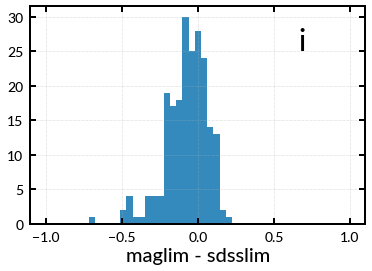

In [27]:
plt.hist(np.array(maglim) - 22.2, bins=np.linspace(-1, 1, 50))
#plt.xlim(-0.5, 0.5)
plt.xlabel('maglim - sdsslim')
ax = plt.gca()
plt.text(0.8, 0.8, f'{band}', transform=ax.transAxes, fontsize=30)
plt.grid()
plt.savefig('zlim.png', bbox='tight')

In [22]:
np.std(maglim)

0.13765118825514713

In [23]:
len(files)

214

In [24]:
len(maglim)

212

In [18]:
len(cat)

1

In [25]:
maglim

[22.13989924068213,
 22.03319256312883,
 22.105963250491456,
 22.25526379254132,
 22.088863590996187,
 22.201904303744683,
 22.243263159895474,
 22.201931345167402,
 22.017902011343466,
 22.09824226183278,
 22.1538954447528,
 22.390817524841477,
 22.288800414309957,
 22.15410523200863,
 22.078550243566035,
 22.078202189505227,
 22.06355278151773,
 22.05328919686633,
 22.16955901747614,
 22.008635940579747,
 22.138669357323028,
 21.99644098067351,
 21.996540256400653,
 22.001573729756014,
 22.140893479607335,
 22.18746436039054,
 22.118382241927154,
 22.169503644771538,
 22.230933410081278,
 22.272224931706386,
 22.302156111991348,
 22.192801919122846,
 22.217116539931208,
 22.34816144341298,
 22.143976718407682,
 22.314935047140203,
 22.11094259918202,
 21.995646135901847,
 21.98593710907667,
 22.03198498924528,
 22.05334865221346,
 22.1901625320884,
 21.947836677472395,
 22.14178617815363,
 22.133994396238993,
 22.02238845993229,
 22.2382110909303,
 22.286932148917714,
 22.00536857300